# Analyse Factorielle des Correspondances

L'analyse factorielle des correspondances (AFC) est une technique factorielle adaptée au traitement des grands tableaux de contingence, tableaux de comptage croisant deux variables qualitatives.

Elle permet de décomposer les principales associations entre les caractéristiques (les modalités) des variables du tableau de contingence.

**Au cours d’une enquête sur les vacances on a demandé à des indvidus d’indiquer leur Catégorie Socio professionnelle (CSP) ainsi que le mode
d’hébergement utilisé lors de leurs dernières vacances.**

__Nous utilions le Package fanalysis__

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Installation du package fanalysis
!pip install fanalysis==0.0.1

     |████████████████████████████████| 56 kB 2.5 MB/s 


In [3]:
import pandas as pd
import numpy as np
from fanalysis.ca import CA

In [33]:
df = pd.read_excel("/content/drive/MyDrive/MT15/TP3_AFC/data/vac_afc.xlsx",index_col=0)
df

,Hotel,Location,Res. Sec.,Parents,Amis,Camping,Sej. Org.,Autres
CSP,,,,,,,,
Agriculteurs,195,62,1,499,44,141,49,65
Patrons,700,354,229,959,185,292,119,140
Cadres. Sup,961,471,633,1580,305,360,162,148
Cadres. Moy,572,537,279,1689,206,748,155,112
Employés,441,404,166,1079,178,434,178,92
Ouvries,783,1114,387,4052,497,1464,525,387
Autres actifs,142,103,210,1133,132,181,46,59
Inactifs,741,332,327,1789,311,236,102,102


In [5]:
# Récupération des données en format numpy array
X = df.values.astype(float)
print(X)
# Calcul de l'effectif total
n=np.sum(X)
n

[[1.950e+02 6.200e+01 1.000e+00 4.990e+02 4.400e+01 1.410e+02 4.900e+01
  6.500e+01]
 [7.000e+02 3.540e+02 2.290e+02 9.590e+02 1.850e+02 2.920e+02 1.190e+02
  1.400e+02]
 [9.610e+02 4.710e+02 6.330e+02 1.580e+03 3.050e+02 3.600e+02 1.620e+02
  1.480e+02]
 [5.720e+02 5.370e+02 2.790e+02 1.689e+03 2.060e+02 7.480e+02 1.550e+02
  1.120e+02]
 [4.410e+02 4.040e+02 1.660e+02 1.079e+03 1.780e+02 4.340e+02 1.780e+02
  9.200e+01]
 [7.830e+02 1.114e+03 3.870e+02 4.052e+03 4.970e+02 1.464e+03 5.250e+02
  3.870e+02]
 [1.420e+02 1.030e+02 2.100e+02 1.133e+03 1.320e+02 1.810e+02 4.600e+01
  5.900e+01]
 [7.410e+02 3.320e+02 3.270e+02 1.789e+03 3.110e+02 2.360e+02 1.020e+02
  1.020e+02]]


31079.0

## Calcul des profils lignes

In [6]:
Profils_ligne=X.copy()
# Calcul de la somme par ligne
somme_ligne=np.sum(X,axis=1)
# Calcul des fréquences par ligne
for i in range(np.shape(X)[0]):
  for j in range(np.shape(X)[1]):
    Profils_ligne[i,j]=round(Profils_ligne[i,j]/somme_ligne[i],3)
# Récupération des résultats dans un DataFrame
df_profils_ligne = pd.DataFrame(Profils_ligne, columns=df.columns,index=df.index)
df_profils_ligne

,Hotel,Location,Res. Sec.,Parents,Amis,Camping,Sej. Org.,Autres
CSP,,,,,,,,
Agriculteurs,0.185,0.059,0.001,0.473,0.042,0.134,0.046,0.062
Patrons,0.235,0.119,0.077,0.322,0.062,0.098,0.040,0.047
Cadres. Sup,0.208,0.102,0.137,0.342,0.066,0.078,0.035,0.032
Cadres. Moy,0.133,0.125,0.065,0.393,0.048,0.174,0.036,0.026
Employés,0.148,0.136,0.056,0.363,0.060,0.146,0.060,0.031
Ouvries,0.085,0.121,0.042,0.440,0.054,0.159,0.057,0.042
Autres actifs,0.071,0.051,0.105,0.565,0.066,0.090,0.023,0.029
Inactifs,0.188,0.084,0.083,0.454,0.079,0.060,0.026,0.026


In [34]:
print(np.sum(df_profils_ligne,axis=1))

Agriculteurs          1.002
Patrons               1.000
Cadres. Sup           1.000
Cadres. Moy           1.000
Employés              1.000
Ouvries               1.000
Autres actifs         1.000
Inactifs              1.000
Profil_ligne_moyen    1.001
dtype: float64


## Calcul des profils colonnes

In [7]:
Profils_colonne=X.copy()
# Calcul de la somme par colonne
somme_colonne=np.sum(X,axis=0)
# Calcul des fréquences par colonne
for i in range(np.shape(X)[0]):
  for j in range(np.shape(X)[1]):
    Profils_colonne[i,j]=round(Profils_colonne[i,j]/somme_colonne[j],3)
# Récupération des résultats dans un DataFrame
df_profils_colonne = pd.DataFrame(Profils_colonne, columns=df.columns,index=df.index)
df_profils_colonne

,Hotel,Location,Res. Sec.,Parents,Amis,Camping,Sej. Org.,Autres
CSP,,,,,,,,
Agriculteurs,0.043,0.018,0.000,0.039,0.024,0.037,0.037,0.059
Patrons,0.154,0.105,0.103,0.075,0.100,0.076,0.089,0.127
Cadres. Sup,0.212,0.139,0.284,0.124,0.164,0.093,0.121,0.134
Cadres. Moy,0.126,0.159,0.125,0.132,0.111,0.194,0.116,0.101
Employés,0.097,0.120,0.074,0.084,0.096,0.113,0.133,0.083
Ouvries,0.173,0.330,0.173,0.317,0.267,0.380,0.393,0.350
Autres actifs,0.031,0.031,0.094,0.089,0.071,0.047,0.034,0.053
Inactifs,0.163,0.098,0.147,0.140,0.167,0.061,0.076,0.092


In [36]:
print(np.sum(df_profils_colonne,axis=0))

Hotel                   0.999
Location                1.000
Res. Sec.               1.000
Parents                 1.000
Amis                    1.000
Camping                 1.001
Sej. Org.               0.999
Autres                  0.999
Profil_moyen_colonne    1.001
dtype: float64


## Calcul du profil moyen ligne

In [43]:
Profil_moyen_ligne = np.around(somme_colonne/n,3)
# Récupération dans un DataFrame
df_profil_moyen_ligne=pd.DataFrame(Profil_moyen_ligne.reshape(1,np.shape(X)[1]),columns=df.columns,index=['Profil_ligne_moyen'])
# Synthèse des profils lignes
df_profils_ligne = pd.concat([df_profils_ligne,df_profil_moyen_ligne])
df_profils_ligne

,Hotel,Location,Res. Sec.,Parents,Amis,Camping,Sej. Org.,Autres
Agriculteurs,0.185,0.059,0.001,0.473,0.042,0.134,0.046,0.062
Patrons,0.235,0.119,0.077,0.322,0.062,0.098,0.040,0.047
Cadres. Sup,0.208,0.102,0.137,0.342,0.066,0.078,0.035,0.032
Cadres. Moy,0.133,0.125,0.065,0.393,0.048,0.174,0.036,0.026
Employés,0.148,0.136,0.056,0.363,0.060,0.146,0.060,0.031
Ouvries,0.085,0.121,0.042,0.440,0.054,0.159,0.057,0.042
Autres actifs,0.071,0.051,0.105,0.565,0.066,0.090,0.023,0.029
Inactifs,0.188,0.084,0.083,0.454,0.079,0.060,0.026,0.026
Profil_ligne_moyen,0.146,0.109,0.072,0.411,0.060,0.124,0.043,0.036
Profil_ligne_moyen,0.146,0.109,0.072,0.411,0.060,0.124,0.043,0.036


In [39]:
print(somme_colonne/n)
print(np.sum(df_profils_ligne,axis=1))

[0.14591847 0.10865858 0.07181698 0.41121014 0.05978313 0.12407092
 0.04298723 0.03555455]
Agriculteurs          1.002
Patrons               1.000
Cadres. Sup           1.000
Cadres. Moy           1.000
Employés              1.000
Ouvries               1.000
Autres actifs         1.000
Inactifs              1.000
Profil_ligne_moyen    1.001
dtype: float64


## Calcul du profil moyen colonne

In [9]:
Profil_moyen_colonne = np.around(somme_ligne/n,3)
# Synthèse des profils colonnes
df_profils_colonne["Profil_moyen_colonne"]=Profil_moyen_colonne
df_profils_colonne

,Hotel,Location,Res. Sec.,Parents,Amis,Camping,Sej. Org.,Autres,Profil_moyen_colonne
CSP,,,,,,,,,
Agriculteurs,0.043,0.018,0.000,0.039,0.024,0.037,0.037,0.059,0.034
Patrons,0.154,0.105,0.103,0.075,0.100,0.076,0.089,0.127,0.096
Cadres. Sup,0.212,0.139,0.284,0.124,0.164,0.093,0.121,0.134,0.149
Cadres. Moy,0.126,0.159,0.125,0.132,0.111,0.194,0.116,0.101,0.138
Employés,0.097,0.120,0.074,0.084,0.096,0.113,0.133,0.083,0.096
Ouvries,0.173,0.330,0.173,0.317,0.267,0.380,0.393,0.350,0.296
Autres actifs,0.031,0.031,0.094,0.089,0.071,0.047,0.034,0.053,0.065
Inactifs,0.163,0.098,0.147,0.140,0.167,0.061,0.076,0.092,0.127


## Application de l'AFC


In [40]:
# On crée une instance de la classe CA, en lui passant ici des labels pour les lignes et les colonnes
# Par défaut, on effectue une AFC en retenant toutes les composantes
# Pour retenir un nombre prédéfini (ex. n=2), il suffit de rajouter l'argument n_components=2
afc = CA(row_labels=df.index.values, 
           col_labels=df.columns.values)

In [41]:
# On estime le modèle en appliquant la méthode fit de la classe CA sur le jeu de données.
afc.fit(X)

CA(col_labels=array(['Hotel ', 'Location', 'Res. Sec.', 'Parents', 'Amis', 'Camping',
       'Sej. Org.', 'Autres'], dtype=object),
   row_labels=array(['Agriculteurs', 'Patrons', 'Cadres. Sup', 'Cadres. Moy',
       'Employés', 'Ouvries', 'Autres actifs', 'Inactifs'], dtype=object))

L'exécution de la méthode afc.fit(X) effectue le calcul de plusieurs attributs dont :

* afc.eig_ : valeurs propres
* afc.row_coord_ : coordonnées des points lignes
* afc.col_coord_ : coordonnées des points colonnes

## Analyse des valeurs propres
L'attribut afc.eig_ contient :

* en 1ère ligne : les valeurs propres en valeur absolue
* en 2ème ligne : les valeurs propres en pourcentage de la variance totale
* en 3ème ligne : les valeurs propres en pourcentage cumulé de la variance totale

In [12]:
# Affichage des valeurs propres
print(afc.eig_[0])

[4.42342930e-02 1.76979809e-02 7.65203990e-03 2.24029453e-03
 1.68375628e-03 2.43085039e-04 8.44913323e-07]


In [13]:
# Pourcentage de l'inertie exprimée par chaque axe
print(afc.eig_[1])

[5.99768363e+01 2.39965157e+01 1.03753245e+01 3.03759299e+00
 2.28298833e+00 3.29596578e-01 1.14560954e-03]


In [42]:
print(np.sum(afc.eig_[1]))

99.99999999999997


In [14]:
# Pourcentage cumulé de l'inertie totale
print(afc.eig_[2])

[ 59.97683631  83.97335198  94.34867649  97.38626948  99.66925781
  99.99885439 100.        ]


### Représentation graphique des valeurs propres

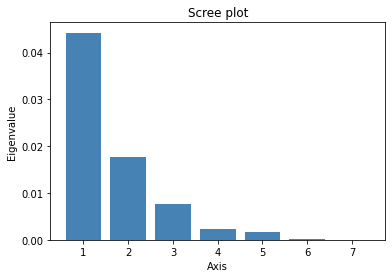

In [15]:
afc.plot_eigenvalues()

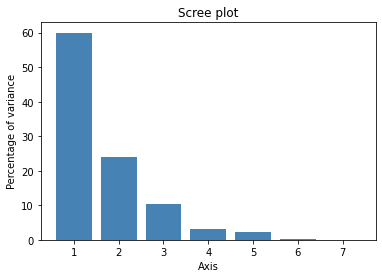

In [16]:
afc.plot_eigenvalues(type="percentage")

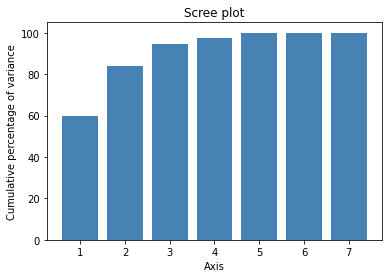

In [17]:
afc.plot_eigenvalues(type="cumulative")

Lors de l'exécution de la méthode afc.fit(X), les statistiques suivantes ont été calculées :

* afc.row_contrib_ : contributions des points lignes à la variance de l'axe
* afc.col_contrib_ : contributions des points colonnes à la variance de l'axe
* afc.row_cos2_ : cosinus carrés des points lignes
* afc.col_cos2_ : cosinus carrés des points colonnes

## Extraction des statistiques sur les points lignes

Export de la totalité des données lignes vers un DataFrame 

In [18]:
df_rows = afc.row_topandas()
df_rows

,row_coord_dim1,row_coord_dim2,row_coord_dim3,row_coord_dim4,row_coord_dim5,row_coord_dim6,row_coord_dim7,row_contrib_dim1,row_contrib_dim2,row_contrib_dim3,...,row_contrib_dim5,row_contrib_dim6,row_contrib_dim7,row_cos2_dim1,row_cos2_dim2,row_cos2_dim3,row_cos2_dim4,row_cos2_dim5,row_cos2_dim6,row_cos2_dim7
Agriculteurs,0.111606,0.009687,0.331080,-0.050281,-0.108914,0.035548,-0.000615,0.956779,0.018014,48.672634,...,23.937839,17.662804,1.519682,0.090379,0.000681,0.795352,0.018345,0.086072,0.009169,2.741967e-06
Patrons,-0.213021,0.175666,0.083576,0.011678,-0.019444,-0.028798,0.001318,9.829741,16.707337,8.746664,...,2.151478,32.689606,19.709882,0.536593,0.364901,0.082597,0.001613,0.004471,0.009806,2.055132e-05
Cadres. Sup,-0.325715,0.022229,-0.092812,0.024703,-0.037327,0.009630,-0.000766,35.652694,0.415045,16.734080,...,12.301119,5.671104,10.311281,0.904472,0.004213,0.073438,0.005203,0.011879,0.000791,4.996529e-06
Cadres. Moy,0.100382,0.069364,-0.071451,-0.105595,0.002748,-0.003501,-0.000165,3.150322,3.759671,9.226477,...,0.062036,0.697243,0.444993,0.323349,0.154394,0.163821,0.357800,0.000242,0.000393,8.724143e-07
Employés,0.067100,0.134872,-0.020814,0.025936,0.049500,0.030893,0.001479,0.973354,9.828884,0.541375,...,13.915773,37.543565,24.763073,0.165497,0.668632,0.015923,0.024725,0.090063,0.035079,8.042223e-05
Ouvries,0.236183,-0.003535,-0.007117,0.037679,-0.002723,-0.006661,-0.000491,37.366645,0.020917,0.196136,...,0.130528,5.408431,8.468988,0.973222,0.000218,0.000884,0.024769,0.000129,0.000774,4.213201e-06
Autres actifs,0.011648,-0.396747,-0.048111,-0.010577,-0.040092,-0.001213,0.001902,0.019798,57.407457,1.952426,...,6.161655,0.039055,27.642799,0.000840,0.974164,0.014325,0.000692,0.009948,0.000009,2.239413e-05
Inactifs,-0.205055,-0.128580,0.091697,-0.011374,0.074098,-0.002351,-0.000690,12.050668,11.842675,13.930208,...,41.339572,0.288192,7.139302,0.579052,0.227678,0.115793,0.001781,0.075612,0.000076,6.552629e-06


In [19]:
# Coordonnées des points lignes
print(np.round(afc.row_coord_,3))

[[ 0.112  0.01   0.331 -0.05  -0.109  0.036 -0.001]
 [-0.213  0.176  0.084  0.012 -0.019 -0.029  0.001]
 [-0.326  0.022 -0.093  0.025 -0.037  0.01  -0.001]
 [ 0.1    0.069 -0.071 -0.106  0.003 -0.004 -0.   ]
 [ 0.067  0.135 -0.021  0.026  0.049  0.031  0.001]
 [ 0.236 -0.004 -0.007  0.038 -0.003 -0.007 -0.   ]
 [ 0.012 -0.397 -0.048 -0.011 -0.04  -0.001  0.002]
 [-0.205 -0.129  0.092 -0.011  0.074 -0.002 -0.001]]


In [20]:
# Contributions des points lignes
np.set_printoptions(suppress=True)
print(np.round(afc.row_contrib_,3))

[[ 0.957  0.018 48.673  3.834 23.938 17.663  1.52 ]
 [ 9.83  16.707  8.747  0.583  2.151 32.69  19.71 ]
 [35.653  0.415 16.734  4.049 12.301  5.671 10.311]
 [ 3.15   3.76   9.226 68.83   0.062  0.697  0.445]
 [ 0.973  9.829  0.541  2.871 13.916 37.544 24.763]
 [37.367  0.021  0.196 18.777  0.131  5.408  8.469]
 [ 0.02  57.407  1.952  0.322  6.162  0.039 27.643]
 [12.051 11.843 13.93   0.732 41.34   0.288  7.139]]


In [21]:
# Qualité de représentation COS2 des points lignes
print(np.round(afc.row_cos2_,3))

[[0.09  0.001 0.795 0.018 0.086 0.009 0.   ]
 [0.537 0.365 0.083 0.002 0.004 0.01  0.   ]
 [0.904 0.004 0.073 0.005 0.012 0.001 0.   ]
 [0.323 0.154 0.164 0.358 0.    0.    0.   ]
 [0.165 0.669 0.016 0.025 0.09  0.035 0.   ]
 [0.973 0.    0.001 0.025 0.    0.001 0.   ]
 [0.001 0.974 0.014 0.001 0.01  0.    0.   ]
 [0.579 0.228 0.116 0.002 0.076 0.    0.   ]]


## Extraction des statistiques sur les points colonnes

Export de la totalité des données colonnes vers une DataFrame pandas

In [22]:
df_cols = afc.col_topandas()
df_cols

,col_coord_dim1,col_coord_dim2,col_coord_dim3,col_coord_dim4,col_coord_dim5,col_coord_dim6,col_coord_dim7,col_contrib_dim1,col_contrib_dim2,col_contrib_dim3,...,col_contrib_dim5,col_contrib_dim6,col_contrib_dim7,col_cos2_dim1,col_cos2_dim2,col_cos2_dim3,col_cos2_dim4,col_cos2_dim5,col_cos2_dim6,col_cos2_dim7
Hotel,-0.334152,0.150817,0.099233,-0.033917,-0.001276,0.007346,-0.000131,36.833294,18.753645,18.777678,...,0.014116,3.239553,0.297342,0.767637,0.156374,0.067698,0.007908,0.000011,0.000371,1.183652e-07
Location,0.077919,0.172513,-0.077248,0.022111,0.055525,-0.022406,-0.001122,1.491376,18.271910,8.473564,...,19.895844,22.440569,16.189535,0.132346,0.648741,0.130079,0.010658,0.067206,0.010943,2.744165e-05
Res. Sec.,-0.402414,-0.103326,-0.233256,0.016537,-0.048577,0.002499,-0.000023,26.291490,4.332343,51.064115,...,10.064826,0.184430,0.004416,0.705113,0.046487,0.236907,0.001191,0.010275,0.000027,2.262363e-09
Parents,0.067744,-0.131024,0.032448,-0.008069,0.004163,0.000939,-0.000387,4.266299,39.887876,5.657998,...,0.423151,0.149022,7.299686,0.200468,0.749895,0.045991,0.002844,0.000757,0.000038,6.551669e-06
Amis,-0.117895,-0.065196,0.011860,0.047073,0.078723,-0.008640,0.002932,1.878501,1.435824,0.109902,...,22.004210,1.835784,60.844413,0.518882,0.158680,0.005251,0.082721,0.231357,0.002787,3.210194e-04
Camping,0.295899,0.124277,-0.066085,-0.065486,-0.029642,0.005537,0.000953,24.558285,10.827425,7.081077,...,6.474656,1.564863,13.336731,0.777816,0.137205,0.038797,0.038097,0.007806,0.000272,8.068285e-06
Sej. Org.,0.208098,0.149199,-0.002081,0.147259,-0.003223,0.049863,-0.000307,4.208388,5.406885,0.002432,...,0.026514,43.968962,0.477975,0.482496,0.248022,0.000048,0.241614,0.000116,0.027703,1.046734e-06
Autres,0.076661,0.073459,0.137880,0.102861,-0.139507,-0.042659,0.000607,0.472368,1.084092,8.833234,...,41.096682,26.616818,1.549901,0.094564,0.086832,0.305904,0.170248,0.313165,0.029282,5.926573e-06


In [23]:
# Coordonnées des points colonnes
print(np.round(afc.col_coord_,3))

[[-0.334  0.151  0.099 -0.034 -0.001  0.007 -0.   ]
 [ 0.078  0.173 -0.077  0.022  0.056 -0.022 -0.001]
 [-0.402 -0.103 -0.233  0.017 -0.049  0.002 -0.   ]
 [ 0.068 -0.131  0.032 -0.008  0.004  0.001 -0.   ]
 [-0.118 -0.065  0.012  0.047  0.079 -0.009  0.003]
 [ 0.296  0.124 -0.066 -0.065 -0.03   0.006  0.001]
 [ 0.208  0.149 -0.002  0.147 -0.003  0.05  -0.   ]
 [ 0.077  0.073  0.138  0.103 -0.14  -0.043  0.001]]


In [24]:
# Contributions des points colonnes
print(np.round(afc.col_contrib_,3))

[[36.833 18.754 18.778  7.493  0.014  3.24   0.297]
 [ 1.491 18.272  8.474  2.371 19.896 22.441 16.19 ]
 [26.291  4.332 51.064  0.877 10.065  0.184  0.004]
 [ 4.266 39.888  5.658  1.195  0.423  0.149  7.3  ]
 [ 1.879  1.436  0.11   5.913 22.004  1.836 60.844]
 [24.558 10.827  7.081 23.75   6.475  1.565 13.337]
 [ 4.208  5.407  0.002 41.61   0.027 43.969  0.478]
 [ 0.472  1.084  8.833 16.791 41.097 26.617  1.55 ]]


In [25]:
# Qualité de représentation COS2 des points colonnes
print(np.round(afc.col_cos2_,3))

[[0.768 0.156 0.068 0.008 0.    0.    0.   ]
 [0.132 0.649 0.13  0.011 0.067 0.011 0.   ]
 [0.705 0.046 0.237 0.001 0.01  0.    0.   ]
 [0.2   0.75  0.046 0.003 0.001 0.    0.   ]
 [0.519 0.159 0.005 0.083 0.231 0.003 0.   ]
 [0.778 0.137 0.039 0.038 0.008 0.    0.   ]
 [0.482 0.248 0.    0.242 0.    0.028 0.   ]
 [0.095 0.087 0.306 0.17  0.313 0.029 0.   ]]


## Représentation graphique

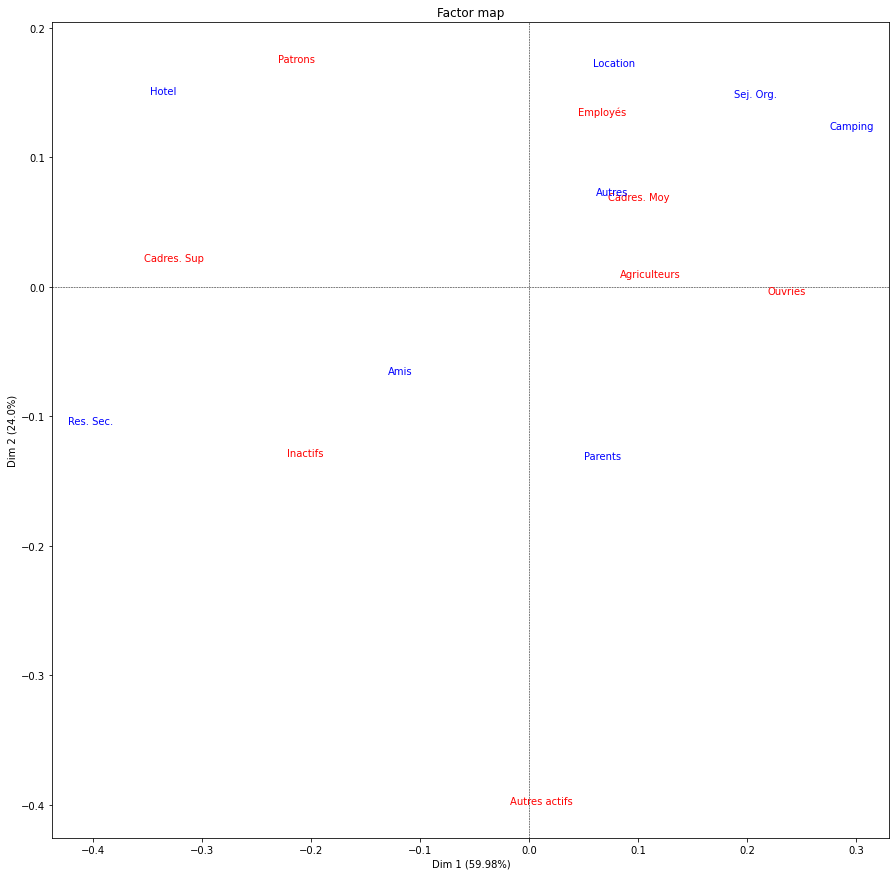

In [26]:
# Représentation graphique simultanée des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
afc.mapping(num_x_axis=1, num_y_axis=2,figsize=(15,15))

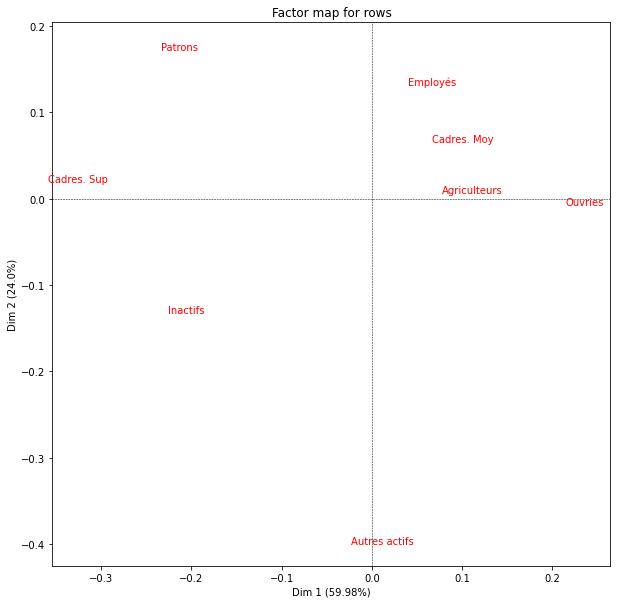

In [27]:
# Représentation graphique des points lignes
afc.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(10,10))

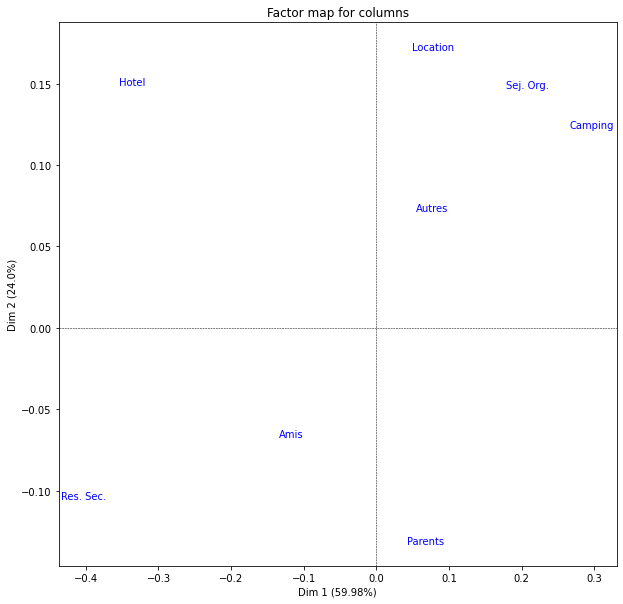

In [28]:
# Représentation graphique des points colonnes
afc.mapping_col(num_x_axis=1, num_y_axis=2,figsize=(10,10))

## Analyse du 1er axe - Points lignes

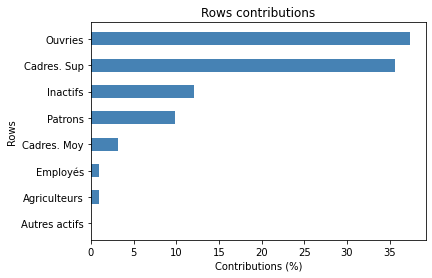

In [29]:
# Classement des points lignes en fonction de leur contribution au 1er axe
# Le paramètre de la méthode plot_row_contrib indique que c'est pour l'axe numéro 1 que les contributions sont ici représentées
afc.plot_row_contrib(num_axis=1)

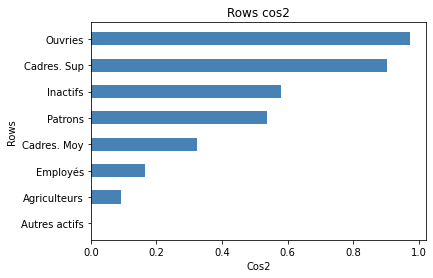

In [30]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
afc.plot_row_cos2(num_axis=1)

## Analyse du 1er axe - Points colonnes

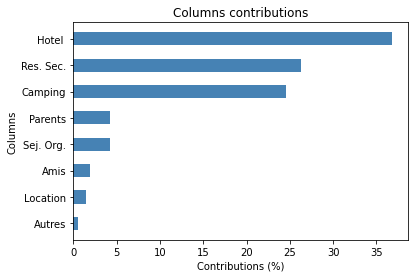

In [31]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
afc.plot_col_contrib(num_axis=1)

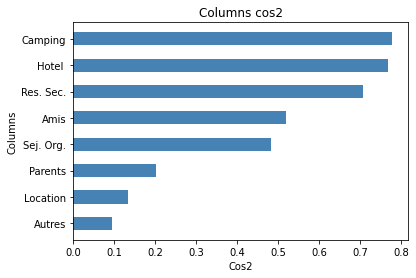

In [32]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
afc.plot_col_cos2(num_axis=1)